# **AIN 214 - PA3 - FALL 2024**




**Student Number** :2230765034

**Name Surname**   :Şeyma Doğan


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 29.11.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>



---


# **Data Prepocessing and Regression**

---
**Dataset Path:** "Data/insurance.csv"
---

We will deal with the insurance dataset. This dataset contains data on individual medical insurance costs based on several demographic and personal health factors.

**Features:**


* Age: Age of the individual
* Sex: Gender of the individual
* BMI: Body Mass Index, a measure of body fat based on height and weight
* Children: Number of children/dependents
* Smoker: Whether the individual smokes or not
* Region: Geographical region in the US
* Charges: Medical expenses (target variable for regression)

# **Necessary Imports**

In [73]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import random

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression


# **PART- 1: Data Preprocessing (50 Pts)**

---

## 1.1. Explaratory Data Analysis (10 Pts)

* a)Check for missing values
* b)Visualize the features with any relevant plots to understand the distribution of data
* c)Visualize the target variable with respect to the features
* d)Visualize the correlation between the features using a heatmap
* e)Comment on any findings

In [74]:
# a) Checks for missing values
df = pd.read_csv("Data/insurance.csv")
print(df.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


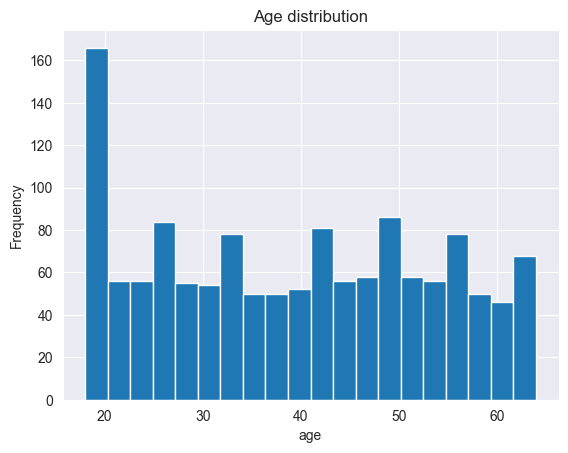

In [75]:
# b) Visualizing
# b.1
plt.hist(df['age'], bins=20)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()

# Age disturbition has a kind of pattern. Some age groups frequency is higher. But mainly it has an even distrubition.

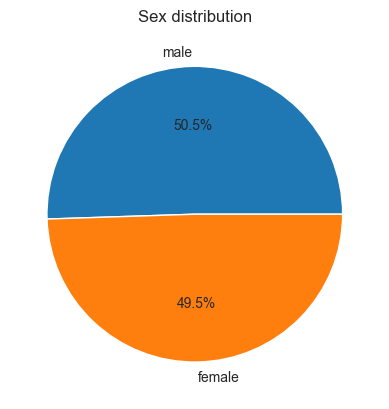

In [76]:
# b.2
SexNumber = df['sex'].value_counts()
plt.pie(SexNumber.values, labels= SexNumber.index, autopct='%1.1f%%') 
plt.title('Sex distribution')
plt.show()
# Sex distrubition is pretty even and that means we will have more accurate findings.

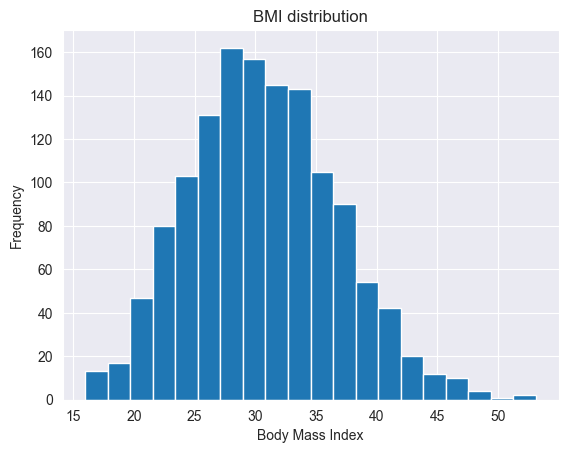

In [77]:
# b.3
plt.hist(df['bmi'], bins=20)
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.title('BMI distribution')
plt.show()

# It has an non-linear distrubition. 

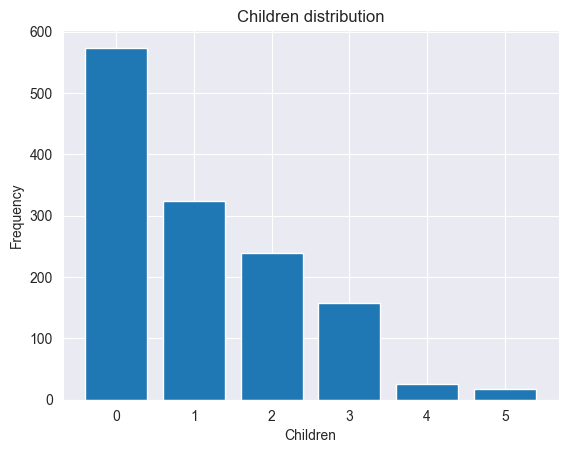

In [78]:
# b.4
ChildrenNumber = df.groupby('children').size()
plt.bar(ChildrenNumber.index, ChildrenNumber.values)
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.title('Children distribution')
plt.show()

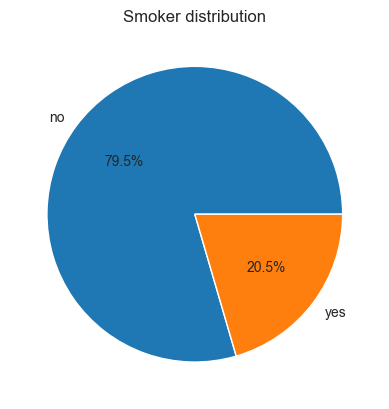

In [26]:
# b.5
SmokerNumber = df['smoker'].value_counts()
plt.pie(SmokerNumber.values, labels= SmokerNumber.index, autopct='%1.1f%%') 
plt.title('Smoker distribution')
plt.show()

# The difference between smokers and non-smokers is really big. So there seems to be a imbalance. This can lead to non-accurate findings.

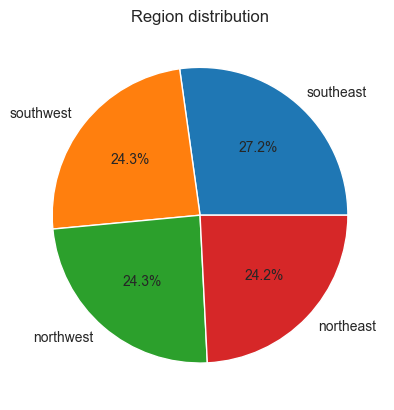

In [27]:
# b.6
RegionNumber = df['region'].value_counts()
plt.pie(RegionNumber.values, labels= RegionNumber.index, autopct='%1.1f%%') 
plt.title('Region distribution')
plt.show()

# Regions are divided pretty equally.

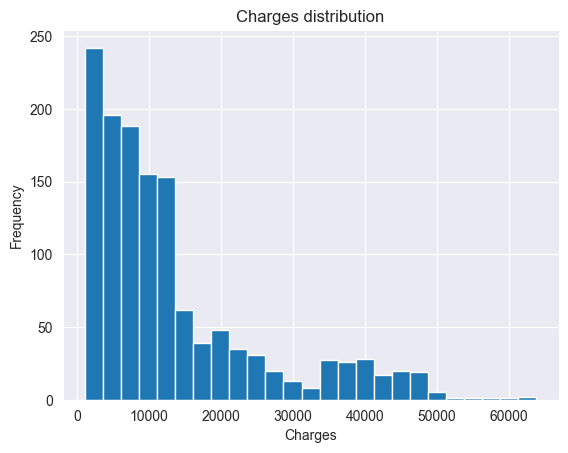

In [28]:
# b.7
plt.hist(df['charges'], bins=25)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges distribution')
plt.show()

# It has a tail and this becomes very effective at the median values.

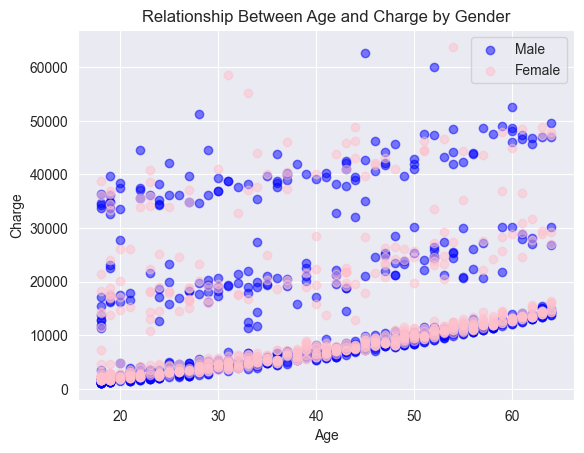

In [29]:
# c) Visualizing the target variable with respect to the features
# c.1&2
 
male_data = df[df['sex'] == 'male']
female_data = df[df['sex'] == 'female']

plt.scatter(male_data['age'], male_data['charges'], color = 'blue', alpha=0.5, label = 'Male')
plt.scatter(female_data['age'], female_data['charges'], color='pink', alpha=0.5, label='Female')

plt.xlabel('Age')
plt.ylabel('Charge')
plt.title('Relationship Between Age and Charge by Gender')
plt.legend()
plt.show()

# Male and Female disturbition seems pretty similar.
# Also we can see 3 patterns kinda like 3 linear line top of each other.

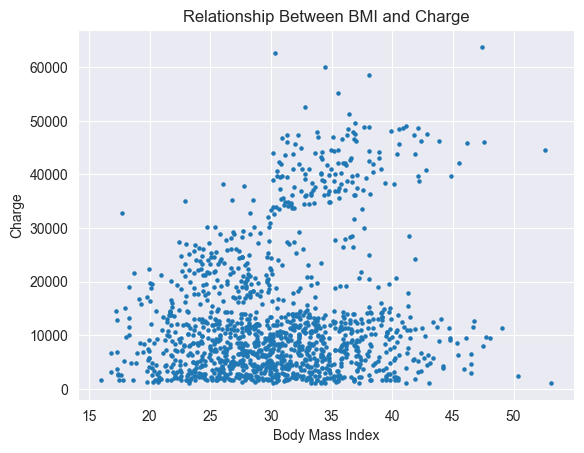

In [30]:
# c.3
plt.scatter(df['bmi'], df['charges'], s=5)

plt.xlabel('Body Mass Index')
plt.ylabel('Charge')
plt.title('Relationship Between BMI and Charge') 
plt.show()
# There don't seems to be corralation between bmi and charges.

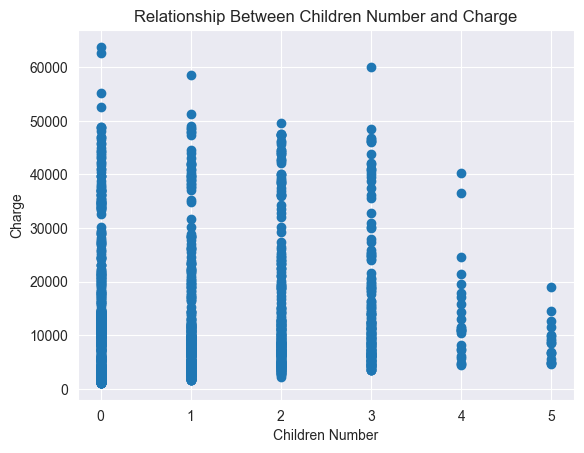

In [31]:
# c.4
plt.scatter(df['children'], df['charges'])

plt.xlabel('Children Number')
plt.ylabel('Charge')
plt.title('Relationship Between Children Number and Charge') 
plt.show()
# Children number effects the charge negativly.

In [32]:
# c.5,6&7
pivot_table = df.pivot_table(
    values='charges',
    index= 'smoker',
    columns='region',
    aggfunc= 'mean'
)
pivot_table

# Most smoker region is southest. That region might cause them stress. But we need more information to make comments about that.

region,northeast,northwest,southeast,southwest
smoker,,,,
no,9165.531672,8556.463715,8032.216309,8019.284513
yes,29673.536473,30192.003182,34844.996824,32269.063494


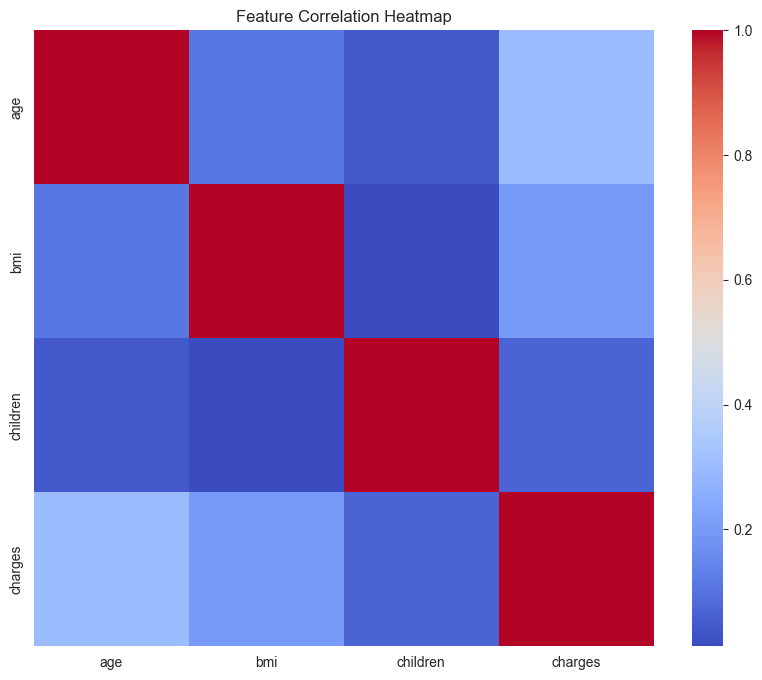

In [33]:
# d) Visualizes the correlation between the features using a heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64']) 

correlation_matrix = numeric_df.corr() 

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# From this heatmap we can see charges are has the most corralation beetween age and bmi.

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

In [48]:
# I choosed Z-score because I find it most easy to understand an d imply.
# Z-score: It's statistical measure that tells the number of standard deviations a value is from the mean of a given distribution.

df_zscore = df.copy()
mean_charges = df_zscore['charges'].mean()
std_charges = df_zscore['charges'].std()

# Z-Score calculation:
df_zscore['Z-score'] = (df_zscore['charges'] - mean_charges) / std_charges
outliers = df_zscore[abs(df_zscore['Z-score']) > 3]

print("outliers:",outliers)

outliers:       age     sex     bmi  children smoker     region      charges  \
34     28    male  36.400         1    yes  southwest  51194.55914   
543    54  female  47.410         0    yes  southeast  63770.42801   
577    31  female  38.095         1    yes  northeast  58571.07448   
819    33  female  35.530         0    yes  northwest  55135.40209   
1146   60    male  32.800         0    yes  southwest  52590.82939   
1230   52    male  34.485         3    yes  northwest  60021.39897   
1300   45    male  30.360         0    yes  southeast  62592.87309   

      region encoded   Z-score  
34               3.0  3.131635  
543              2.0  4.170104  
577              0.0  3.740761  
819              1.0  3.457055  
1146             3.0  3.246934  
1230             1.0  3.860523  
1300             2.0  4.072866  


## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

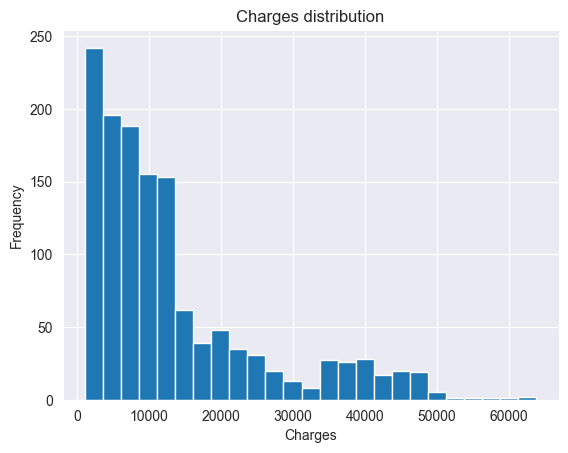

In [45]:
# checkpoint for baseline comparison
plt.hist(df['charges'], bins=25)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges distribution')
plt.show()

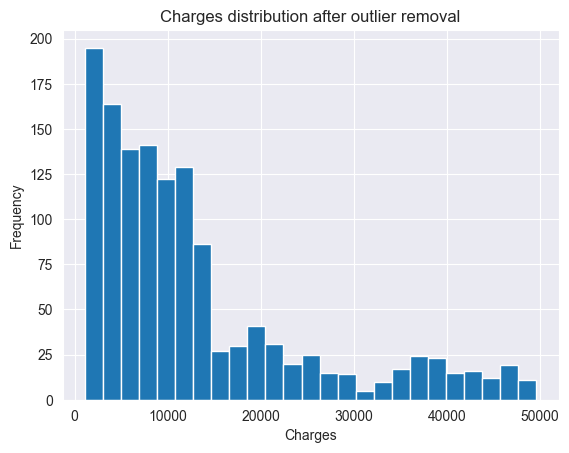

In [49]:
# Outlier removal
df_cleaned = df[abs(df_zscore['Z-score']) <= 3]
plt.hist(df_cleaned['charges'], bins=25)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges distribution after outlier removal')
plt.show()

# Removing the outliers made us to focus on the main distrubition but it also gaved more weight to low charges.
# So removing outliers is generally not a good idea, it can effect our infers. 

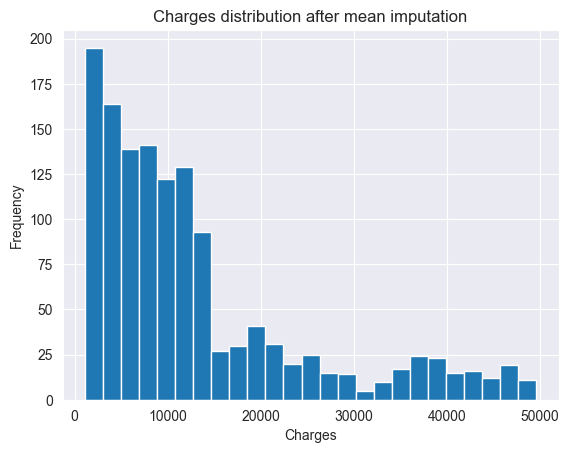

In [79]:
# Mean Imputation
df_mean = df_zscore.copy()
mean_value = df['charges'].mean()
df_mean.loc[abs(df_mean['Z-score']) > 3, 'charges'] = mean_value 
plt.hist(df_mean['charges'], bins=25)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges distribution after mean imputation')
plt.show()

# I think mode imputation is unnecessary for now. Cause they does not affect the charges so much.
# It smoothened the change beetween histogram colons.

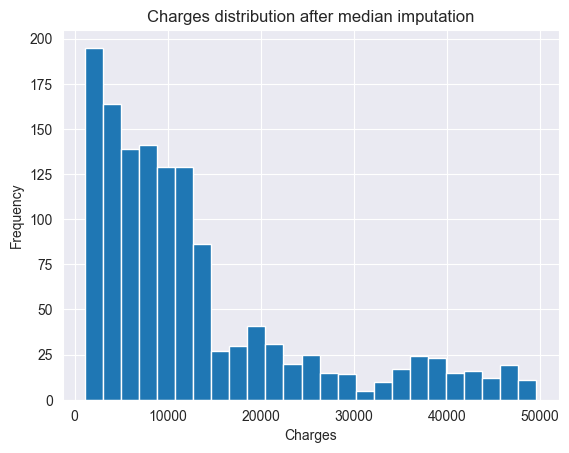

In [57]:
# Median Imputation
df_median = df_zscore.copy()
median_value = df['charges'].median()
df_median.loc[abs(df_median['Z-score']) > 3, 'charges'] = median_value 
plt.hist(df_median['charges'], bins=25)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charges distribution after median imputation')
plt.show()

# I think mode imputation is unnecessary for now.
# It made the distrubition extend and made it more clear to see changes.

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [40]:
encoder = OrdinalEncoder() 
df['region encoded'] = encoder.fit_transform(df[['region']])
print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      region encoded  
0                3.0  
1                2.0  
2                2.0  
3                1.0  
4                1.0  
...              ... 

## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split. (8 Pts)

* ***You  cannot use scikit-learn's shuffle.***

In [61]:
df_manual_shuffle = df.copy()

indices = list(range(len(df_manual_shuffle)))
random.seed(456)
random.shuffle(indices)

shuffled_data =[]
while indices:
    indexx = indices.pop()
    shuffled_data.append(df_manual_shuffle.iloc[indexx])
    
shuffled_df = pd.DataFrame(shuffled_data)

# split part
train_size = int(0.7 * len(shuffled_df))
train_df = shuffled_df.iloc[:train_size]
test_df = shuffled_df.iloc[train_size:]

# Display the results
print("Training Set:")
print(train_df)
print("\nTesting Set:")
print(test_df)

# I created a copy of the original DataFrame and randomly shuffles its rows using pop() function and random number generator.

Training Set:
      age     sex     bmi  children smoker     region      charges  \
920    62  female  25.000         0     no  southwest  13451.12200   
954    34    male  27.835         1    yes  northwest  20009.63365   
891    36  female  29.040         4     no  southeast   7243.81360   
799    33    male  24.795         0    yes  northeast  17904.52705   
1327   51    male  30.030         1     no  southeast   9377.90470   
...   ...     ...     ...       ...    ...        ...          ...   
1154   48  female  27.930         4     no  northwest  11015.17470   
58     53  female  22.880         1    yes  southeast  23244.79020   
758    30    male  37.430         3     no  northeast   5428.72770   
706    51  female  38.060         0    yes  southeast  44400.40640   
854    49  female  23.845         3    yes  northeast  24106.91255   

      region encoded  
920              3.0  
954              1.0  
891              2.0  
799              0.0  
1327             2.0  
...    

# **PART- 2: REGRESSION (50 Pts)**
* Target value: charges
* Predictors: The rest

* ***You can use scikit-learn***




## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:
    * a) Split the data into train and test sets
    * b) Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data.
    * c) Predict the test set and calculate the MSE value for each k.
    * d) Plot the MSE vs k curve to decide on the optimal k.
    * e)Report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?


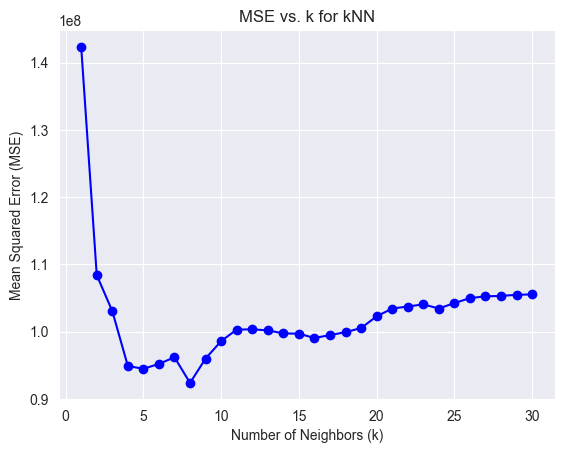

Optimal k: 8
R-squared value for optimal k: 0.2421
Optimal kNN MSE: 92390313.2208


In [65]:
# 1- Original dataset
# 1.a
df_new1 = pd.get_dummies(df)
# Categorical into dummy variables (one-hot encoding) 

# Data spliting
X = df_new1.drop('charges', axis=1)
Y = df_new1['charges']
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=17) 

# Data preprocessing
# 1.b and 1.c
k_values = range(1, 31) # Range of k values to test
mse_values = []  # To store MSE for each k 
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(train_x, train_y)  # Fit the model using training data
    predictions = knn_regressor.predict(test_x) # Predicts on test data
    mse = mean_squared_error(test_y, predictions)  # Mean Squared Error
    mse_values.append(mse)

# 1.d 
plt.plot(k_values, mse_values,marker = 'o',color= 'b')
plt.title('MSE vs. k for kNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)') 
plt.show()

# 1.e
# Find the optimal k (k corresponding to minimum MSE)
optimal_k = k_values[mse_values.index(min(mse_values))]

# Train the model with the optimal k
optimal_knn_regressor = KNeighborsRegressor(n_neighbors=optimal_k)
optimal_knn_regressor.fit(train_x, train_y)

# Predict on the test set
optimal_predictions = optimal_knn_regressor.predict(test_x)

# Calculate the R-squared value
r_squared = r2_score(test_y, optimal_predictions)

# Report the results
print(f"Optimal k: {optimal_k}")
print(f"R-squared value for optimal k: {r_squared:.4f}")

knn_mse_optimal = min(mse_values)
print(f"Optimal kNN MSE: {knn_mse_optimal:.4f}")


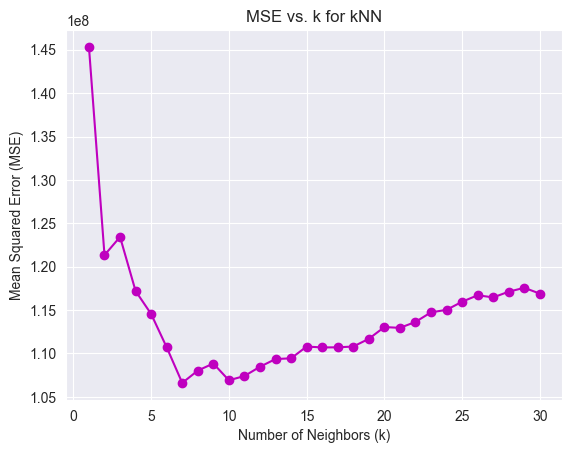

Optimal k : 7
R-squared value for optimal k: 0.2148
Optimal kNN MSE: 106604893.8645


In [67]:
# 2- Outlier-removed dataset
# 2.a
df_new1 = pd.get_dummies(df_cleaned)
# Categorical into dummy variables (one-hot encoding) 

# Data spliting
X = df_new1.drop('charges', axis=1)
Y = df_new1['charges']
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=17) 

# Data preprocessing
# 2.b and 2.c
k_values = range(1, 31) # Range of k values to test
mse_values = []  # To store MSE for each k 
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(train_x, train_y)  # Fit the model using training data
    predictions = knn_regressor.predict(test_x) # Predicts on test data
    mse = mean_squared_error(test_y, predictions)  # Mean Squared Error
    mse_values.append(mse)

# 2.d 
plt.plot(k_values, mse_values,marker = 'o',color= 'm')
plt.title('MSE vs. k for kNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)') 
plt.show()

# 2.e
# Find the optimal k (k corresponding to minimum MSE)
optimal_k = k_values[mse_values.index(min(mse_values))]

# Train the model with the optimal k
optimal_knn_regressor = KNeighborsRegressor(n_neighbors=optimal_k)
optimal_knn_regressor.fit(train_x, train_y)

# Predict on the test set
optimal_predictions = optimal_knn_regressor.predict(test_x)

# Calculate the R-squared value
r_squared = r2_score(test_y, optimal_predictions)

# Report the results
print(f"Optimal k : {optimal_k}")
print(f"R-squared value for optimal k: {r_squared:.4f}")

knn_mse_optimal = min(mse_values)
print(f"Optimal kNN MSE: {knn_mse_optimal:.4f}")

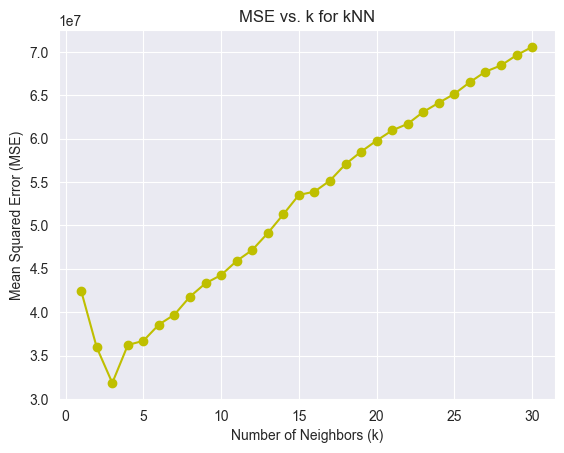

Optimal k : 3
R-squared value for optimal k: 0.7259
Optimal kNN MSE: 31841877.6670


In [68]:
# 3- Mean-imputed dataset
# 3.a
df_new1 = pd.get_dummies(df_mean)
# Categorical into dummy variables (one-hot encoding) 

# Data spliting
X = df_new1.drop('charges', axis=1)
Y = df_new1['charges']
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=17) 

# Data preprocessing
# 3.b and 3.c
k_values = range(1, 31) # Range of k values to test
mse_values = []  # To store MSE for each k 
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(train_x, train_y)  # Fit the model using training data
    predictions = knn_regressor.predict(test_x) # Predicts on test data
    mse = mean_squared_error(test_y, predictions)  # Mean Squared Error
    mse_values.append(mse)

# 3.d 
plt.plot(k_values, mse_values,marker = 'o',color= 'y')
plt.title('MSE vs. k for kNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)') 
plt.show()

# 3.e
# Find the optimal k (k corresponding to minimum MSE)
optimal_k = k_values[mse_values.index(min(mse_values))]

# Train the model with the optimal k
optimal_knn_regressor = KNeighborsRegressor(n_neighbors=optimal_k)
optimal_knn_regressor.fit(train_x, train_y)

# Predict on the test set
optimal_predictions = optimal_knn_regressor.predict(test_x)

# Calculate the R-squared value
r_squared = r2_score(test_y, optimal_predictions)

# Report the results
print(f"Optimal k : {optimal_k}")
print(f"R-squared value for optimal k: {r_squared:.4f}")

# I think mean imputed dataset is the most accurate one cause of its R-squared value for optimal k.

knn_mse_optimal = min(mse_values)
print(f"Optimal kNN MSE: {knn_mse_optimal:.4f}")

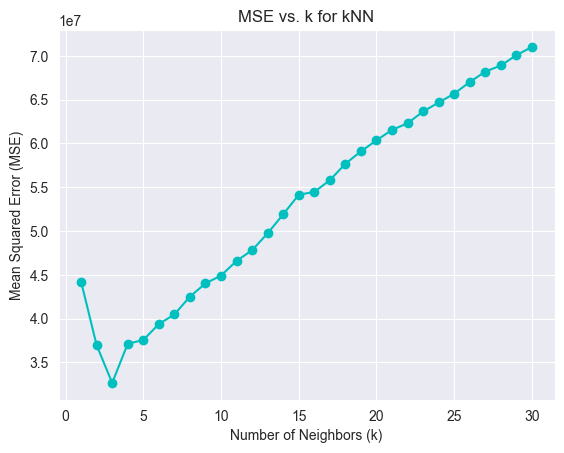

Optimal k : 3
R-squared value for optimal k: 0.7189
Optimal kNN MSE: 32652910.9782


In [70]:
# 4- Median-imputed dataset
# 4.a
df_new1 = pd.get_dummies(df_median)
# Categorical into dummy variables (one-hot encoding) 

# Data spliting
X = df_new1.drop('charges', axis=1)
Y = df_new1['charges']
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=17) 

# Data preprocessing
# 4.b and 4.c
k_values = range(1, 31) # Range of k values to test
mse_values = []  # To store MSE for each k 
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(train_x, train_y)  # Fit the model using training data
    predictions = knn_regressor.predict(test_x) # Predicts on test data
    mse = mean_squared_error(test_y, predictions)  # Mean Squared Error
    mse_values.append(mse)

# 4.d 
plt.plot(k_values, mse_values,marker = 'o',color= 'c')
plt.title('MSE vs. k for kNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)') 
plt.show()

# 4.e
# Find the optimal k (k corresponding to minimum MSE)
optimal_k = k_values[mse_values.index(min(mse_values))]

# Train the model with the optimal k
optimal_knn_regressor = KNeighborsRegressor(n_neighbors=optimal_k)
optimal_knn_regressor.fit(train_x, train_y)

# Predict on the test set
optimal_predictions = optimal_knn_regressor.predict(test_x)

# Calculate the R-squared value
r_squared = r2_score(test_y, optimal_predictions)

# Report the results
print(f"Optimal k : {optimal_k}")
print(f"R-squared value for optimal k: {r_squared:.4f}")

knn_mse_optimal = min(mse_values)
print(f"Optimal kNN MSE: {knn_mse_optimal:.4f}")


## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following steps:
    * Split the data into train and test sets
    * Fit a linear regression model to train data.
    * Predict the test set and calculate the MSE value.

In [64]:
# 1- Original dataset
df_new_linear = pd.get_dummies(df)
X = df_new_linear.drop('charges', axis=1)
Y = df_new_linear['charges']
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=68)

linear_regressor = LinearRegression()  # Create an instance of Linear Regression
linear_regressor.fit(train_x, train_y)  # Fit the model to training data

# Predict the test set
test_predictions = linear_regressor.predict(test_x)

# Calculate the Mean Squared Error (MSE)
linear_mse = mean_squared_error(test_y, test_predictions)
print(f"Linear Regression MSE: {linear_mse:.4f}") 

Linear Regression MSE: 36979810.5108


In [66]:
# 2- Outlier-removed dataset
df_new_linear = pd.get_dummies(df_cleaned)
X = df_new_linear.drop('charges', axis=1)
Y = df_new_linear['charges']
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=68)

linear_regressor = LinearRegression()  # Create an instance of Linear Regression
linear_regressor.fit(train_x, train_y)  # Fit the model to training data

# Predict the test set
test_predictions = linear_regressor.predict(test_x)

# Calculate the Mean Squared Error (MSE)
linear_mse = mean_squared_error(test_y, test_predictions)
print(f"Linear Regression MSE: {linear_mse:.4f}")

Linear Regression MSE: 33529040.2767


In [71]:
# 3- Mean-imputed dataset
df_new_linear = pd.get_dummies(df_mean)
X = df_new_linear.drop('charges', axis=1)
Y = df_new_linear['charges']
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=68)

linear_regressor = LinearRegression()  # Create an instance of Linear Regression
linear_regressor.fit(train_x, train_y)  # Fit the model to training data

# Predict the test set
test_predictions = linear_regressor.predict(test_x)

# Calculate the Mean Squared Error (MSE)
linear_mse = mean_squared_error(test_y, test_predictions)
print(f"Linear Regression MSE: {linear_mse:.4f}")


Linear Regression MSE: 17207718.5283


In [72]:
# 4- Mean-imputed dataset
df_new_linear = pd.get_dummies(df_median)
X = df_new_linear.drop('charges', axis=1)
Y = df_new_linear['charges']
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=68)

linear_regressor = LinearRegression()  # Create an instance of Linear Regression
linear_regressor.fit(train_x, train_y)  # Fit the model to training data

# Predict the test set
test_predictions = linear_regressor.predict(test_x)

# Calculate the Mean Squared Error (MSE)
linear_mse = mean_squared_error(test_y, test_predictions)
print(f"Linear Regression MSE: {linear_mse:.4f}")

Linear Regression MSE: 20372315.2285


## 2.3. Compare the Regression Methods (10 Pts)

* Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.).

* Discuss the strengths and limitations of each model based on your results

In [ ]:
# If we compare 2 regression methods linear regression did a better job. Cause it's error is much more lower.
# But in more complex dataset KNN regression would be much more accurate. Cause linear regression tries to put values on a line.
# And not every dataset has a linear model.

# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw3.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.